In [2]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Menggunakan path ke file ZIP
zip_file_path = '/content/drive/MyDrive/ds/dataset kedelai fixbgt.zip'
extract_folder = '/content/ekstrak_dataset'

In [4]:
# Mengekstrak file ZIP
import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [5]:
# prompt: tampilkan citra hasil ekstraksi sesuai kelasnya

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Folder yang berisi gambar hasil ekstraksi
extracted_folder = '/content/ekstrak_dataset'

# Membuat daftar kelas (folder)
classes = [folder for folder in os.listdir(extracted_folder) if os.path.isdir(os.path.join(extracted_folder, folder))]

# Loop melalui setiap kelas
for class_name in classes:
  class_folder = os.path.join(extracted_folder, class_name)
  print(f"Kelas: {class_name}")

  # Loop melalui setiap gambar dalam kelas
  for image_name in os.listdir(class_folder):
    image_path = os.path.join(class_folder, image_name)
    if os.path.isfile(image_path):
      try:
        img = mpimg.imread(image_path)
        # plt.imshow(img)
        # plt.title(f"Gambar: {image_name} (Kelas: {class_name})")
        # plt.show()
      except Exception as e:
        print(f"Gagal menampilkan gambar {image_name}: {e}")


Kelas: utuh
Kelas: kulit rusak
Kelas: pecah


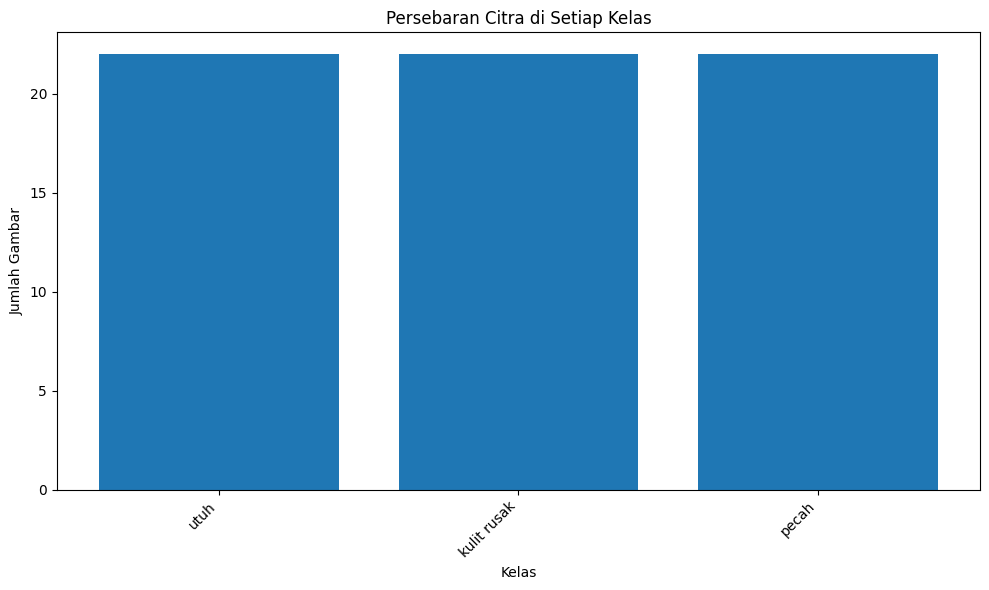

In [6]:
# Folder yang berisi gambar hasil ekstraksi
extracted_folder = '/content/ekstrak_dataset'

# Membuat daftar kelas (folder)
classes = [folder for folder in os.listdir(extracted_folder) if os.path.isdir(os.path.join(extracted_folder, folder))]

# Dictionary untuk menyimpan jumlah gambar di setiap kelas
class_counts = {}

# Loop melalui setiap kelas
for class_name in classes:
  class_folder = os.path.join(extracted_folder, class_name)
  class_counts[class_name] = len([f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))])


# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Persebaran Citra di Setiap Kelas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Kelas: utuh
Kelas: kulit rusak
Kelas: pecah


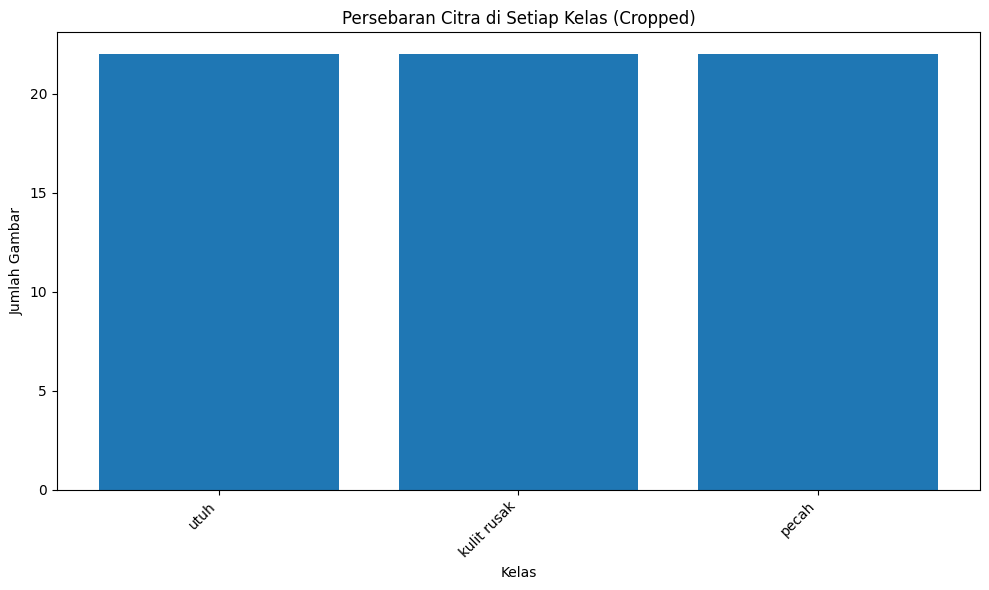

In [7]:
# prompt: crop background untuk setiap citra pada  masing masing kelas lalu tampilkan dan simoan

from google.colab import drive
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np


# Membuat daftar kelas (folder)
classes = [folder for folder in os.listdir(extracted_folder) if os.path.isdir(os.path.join(extracted_folder, folder))]

# Folder untuk menyimpan hasil crop
cropped_folder = '/content/cropped_dataset'
if not os.path.exists(cropped_folder):
    os.makedirs(cropped_folder)


# Loop melalui setiap kelas
for class_name in classes:
  class_folder = os.path.join(extracted_folder, class_name)
  cropped_class_folder = os.path.join(cropped_folder, class_name)
  if not os.path.exists(cropped_class_folder):
    os.makedirs(cropped_class_folder)
  print(f"Kelas: {class_name}")

  # Loop melalui setiap gambar dalam kelas
  for image_name in os.listdir(class_folder):
    image_path = os.path.join(class_folder, image_name)
    if os.path.isfile(image_path):
      try:
        img = Image.open(image_path)
        # Konversi gambar ke numpy array
        img_np = np.array(img)

        # Tentukan batas crop (misalnya, crop tengah)
        height, width, _ = img_np.shape
        start_row, start_col = int(height * 0.25), int(width * 0.25)
        end_row, end_col = int(height * 0.75), int(width * 0.75)

        # Crop gambar
        cropped_img_np = img_np[start_row:end_row, start_col:end_col]
        cropped_img = Image.fromarray(cropped_img_np)

        # Simpan gambar yang telah di-crop
        cropped_image_path = os.path.join(cropped_class_folder, image_name)
        cropped_img.save(cropped_image_path)

        # Tampilkan gambar yang telah di-crop
        # plt.imshow(cropped_img_np)
        # plt.title(f"Gambar: {image_name} (Kelas: {class_name})")
        # plt.show()

      except Exception as e:
        print(f"Gagal menampilkan gambar {image_name}: {e}")

# Folder yang berisi gambar hasil ekstraksi
extracted_folder = '/content/cropped_dataset'

# Membuat daftar kelas (folder)
classes = [folder for folder in os.listdir(extracted_folder) if os.path.isdir(os.path.join(extracted_folder, folder))]

# Dictionary untuk menyimpan jumlah gambar di setiap kelas
class_counts = {}

# Loop melalui setiap kelas
for class_name in classes:
  class_folder = os.path.join(extracted_folder, class_name)
  class_counts[class_name] = len([f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))])


# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Persebaran Citra di Setiap Kelas (Cropped)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
import cv2
import numpy as np
import os
from PIL import Image

# Fungsi untuk preprocessing gambar
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ubah ke RGB

        # Ubah ukuran gambar
        img = cv2.resize(img, target_size)

        # Hapus latar belakang menggunakan segmentasiA
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        mask = np.zeros(img.shape[:2], np.uint8)
        cv2.drawContours(mask, contours, -1, (255, 255, 255), -1)
        result = cv2.bitwise_and(img, img, mask=mask)

        # Ganti latar belakang yang tidak terdeteksi menjadi hitam
        result[mask == 0] = [0, 0, 0]

        return result

    except Exception as e:
        print(f"Error processing image: {image_path}, {e}")
        return None

# Path ke folder ekstrak dataset dan folder penyimpanan hasil preprocessing
dataset_folder = '/content/cropped_dataset'
preprocessed_folder = '/content/preprocessed_datasetmartinfixbgtbgt'

# Buat folder penyimpanan hasil preprocessing jika belum ada
if not os.path.exists(preprocessed_folder):
    os.makedirs(preprocessed_folder)

# Loop melalui folder-folder di dalam dataset
for label in os.listdir(dataset_folder):
    label_folder = os.path.join(dataset_folder, label)
    if os.path.isdir(label_folder):
        print(f"Label: {label}")
        preprocessed_label_folder = os.path.join(preprocessed_folder, label)
        if not os.path.exists(preprocessed_label_folder):
            os.makedirs(preprocessed_label_folder)

        # Loop melalui file gambar di dalam setiap folder label
        for image_file in os.listdir(label_folder):
            image_path = os.path.join(label_folder, image_file)

            # Lakukan preprocessing gambar
            preprocessed_img = preprocess_image(image_path)

            if preprocessed_img is not None:
                # Simpan gambar yang sudah diproses
                preprocessed_image_path = os.path.join(preprocessed_label_folder, image_file)
                Image.fromarray(preprocessed_img).save(preprocessed_image_path)

                # Tampilkan gambar hasil preprocessing
                # plt.imshow(preprocessed_img)
                # plt.title(f"Label: {label}, File: {image_file} (Preprocessed)")
                # plt.show()

        print("-" * 20)

Label: utuh
--------------------
Label: kulit rusak
--------------------
Label: pecah
--------------------


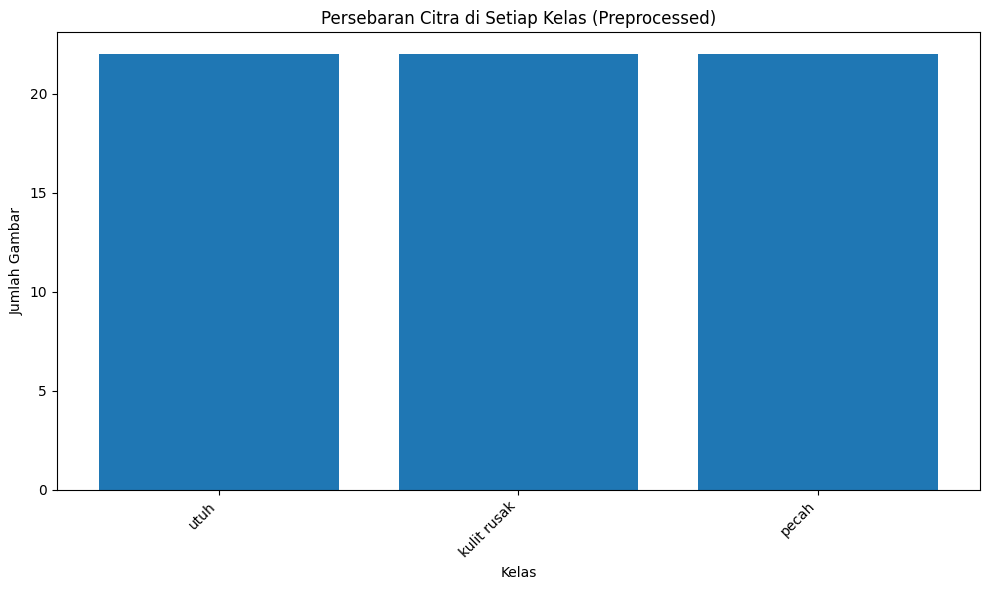

Jumlah gambar di setiap kelas setelah preprocessing:
utuh: 22
kulit rusak: 22
pecah: 22


In [9]:
# prompt: hitung hasil preprocesing tiap kelas

# Folder yang berisi gambar hasil preprocessing
preprocessed_folder = '/content/preprocessed_datasetmartinfixbgtbgt'

# Membuat daftar kelas (folder)
classes = [folder for folder in os.listdir(preprocessed_folder) if os.path.isdir(os.path.join(preprocessed_folder, folder))]

# Dictionary untuk menyimpan jumlah gambar di setiap kelas
class_counts = {}

# Loop melalui setiap kelas
for class_name in classes:
  class_folder = os.path.join(preprocessed_folder, class_name)
  class_counts[class_name] = len([f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))])


# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Persebaran Citra di Setiap Kelas (Preprocessed)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Jumlah gambar di setiap kelas setelah preprocessing:")
for class_name, count in class_counts.items():
  print(f"{class_name}: {count}")

In [10]:
# prompt: split data 20 untuk testing menggunakan sckit learn

from sklearn.model_selection import train_test_split
import os
import shutil

# Path ke folder dataset yang sudah di-preprocess
dataset_folder = '/content/preprocessed_datasetmartinfixbgtbgt'

# Rasio data testing (20%)
test_size = 0.2

# Buat folder untuk menyimpan data training dan testing
train_folder = '/content/train_dataset'
test_folder = '/content/test_dataset'

if not os.path.exists(train_folder):
    os.makedirs(train_folder)
if not os.path.exists(test_folder):
    os.makedirs(test_folder)


# Loop melalui setiap kelas (folder) di dataset
for class_name in os.listdir(dataset_folder):
    class_folder = os.path.join(dataset_folder, class_name)
    if os.path.isdir(class_folder):
        # Buat folder kelas di folder training dan testing
        train_class_folder = os.path.join(train_folder, class_name)
        test_class_folder = os.path.join(test_folder, class_name)

        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Ambil daftar gambar di folder kelas
        images = [f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))]

        # Bagi gambar menjadi data training dan testing menggunakan train_test_split
        train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)

        # Pindahkan gambar training ke folder training
        for image in train_images:
            src_path = os.path.join(class_folder, image)
            dst_path = os.path.join(train_class_folder, image)
            shutil.copy(src_path, dst_path)

        # Pindahkan gambar testing ke folder testing
        for image in test_images:
            src_path = os.path.join(class_folder, image)
            dst_path = os.path.join(test_class_folder, image)
            shutil.copy(src_path, dst_path)

print("Pembagian data training dan testing selesai!")

Pembagian data training dan testing selesai!


In [11]:
# prompt: hitung banyaknya citra setiap kelas untuk data testing dan training

# Folder yang berisi gambar training
train_folder = '/content/train_dataset'

# Folder yang berisi gambar testing
test_folder = '/content/test_dataset'

# Fungsi untuk menghitung jumlah gambar di setiap kelas
def count_images_per_class(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            class_counts[class_name] = len([f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))])
    return class_counts

# Hitung jumlah gambar training per kelas
train_class_counts = count_images_per_class(train_folder)

# Hitung jumlah gambar testing per kelas
test_class_counts = count_images_per_class(test_folder)


print("Jumlah gambar training di setiap kelas:")
for class_name, count in train_class_counts.items():
  print(f"{class_name}: {count}")

print("\nJumlah gambar testing di setiap kelas:")
for class_name, count in test_class_counts.items():
  print(f"{class_name}: {count}")

Jumlah gambar training di setiap kelas:
utuh: 17
kulit rusak: 17
pecah: 17

Jumlah gambar testing di setiap kelas:
utuh: 5
kulit rusak: 5
pecah: 5


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2

# Path ke folder training
train_folder = '/content/train_dataset'

# Buat ImageDataGenerator untuk augmentasi data
datagen = ImageDataGenerator(
    rotation_range=40,  # Rotasi gambar
    width_shift_range=0.2,  # Pergeseran horizontal
    height_shift_range=0.2,  # Pergeseran vertikal
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom gambar
    horizontal_flip=True,  # Flip horizontal
    vertical_flip=True,  # Flip vertikal
    brightness_range=[0.8, 1.2],  # Perubahan kecerahan
    channel_shift_range=30.0,  # Pergeseran saluran warna
    fill_mode='nearest'  # Cara mengisi pixel yang hilang
)

# Loop melalui setiap kelas di folder training
for class_name in os.listdir(train_folder):
    class_folder = os.path.join(train_folder, class_name)
    if os.path.isdir(class_folder):
        print(f"Augmentasi untuk kelas: {class_name}")
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            if os.path.isfile(image_path):
                img = cv2.imread(image_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Pastikan gambar dalam format RGB
                img = img.reshape((1,) + img.shape)  # Ubah bentuk gambar untuk ImageDataGenerator

                # Generate augmentasi
                i = 0
                for batch in datagen.flow(img, batch_size=1,
                                          save_to_dir=class_folder,
                                          save_prefix='aug',
                                          save_format='jpg'):
                    i += 1
                    if i >= 8:  # Hentikan setelah menghasilkan 8 citra augmentasi
                        break


Augmentasi untuk kelas: utuh
Augmentasi untuk kelas: kulit rusak
Augmentasi untuk kelas: pecah


In [13]:
# prompt: hitung data training  sesudah augmentasi

# Folder yang berisi gambar training setelah augmentasi
train_folder = '/content/train_dataset'

# Fungsi untuk menghitung jumlah gambar di setiap kelas
def count_images_per_class(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            class_counts[class_name] = len([f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))])
    return class_counts

# Hitung jumlah gambar training per kelas setelah augmentasi
train_class_counts_after_augmentation = count_images_per_class(train_folder)

print("\nJumlah gambar training di setiap kelas setelah augmentasi:")
for class_name, count in train_class_counts_after_augmentation.items():
  print(f"{class_name}: {count}")


Jumlah gambar training di setiap kelas setelah augmentasi:
utuh: 152
kulit rusak: 152
pecah: 153


In [14]:
# prompt: lakukan balancing supaya setiap kelas memiliki total citra yang sama

# Folder yang berisi gambar training
train_folder = '/content/train_dataset'

# Fungsi untuk menghitung jumlah gambar di setiap kelas
def count_images_per_class(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            class_counts[class_name] = len([f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))])
    return class_counts

# Hitung jumlah gambar training per kelas sebelum balancing
train_class_counts_before_balancing = count_images_per_class(train_folder)

# Temukan jumlah minimum gambar di setiap kelas
min_images = min(train_class_counts_before_balancing.values())

# Balancing dataset
for class_name in os.listdir(train_folder):
    class_folder = os.path.join(train_folder, class_name)
    if os.path.isdir(class_folder):
        images = [f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))]
        if len(images) > min_images:
            # Hapus gambar secara acak hingga jumlahnya sama dengan min_images
            images_to_remove = len(images) - min_images
            images_to_remove_indices = np.random.choice(len(images), images_to_remove, replace=False)
            for index in sorted(images_to_remove_indices, reverse=True):
                os.remove(os.path.join(class_folder, images[index]))


# Hitung jumlah gambar training per kelas setelah balancing
train_class_counts_after_balancing = count_images_per_class(train_folder)

print("\nJumlah gambar training di setiap kelas sebelum balancing:")
for class_name, count in train_class_counts_before_balancing.items():
  print(f"{class_name}: {count}")

print("\nJumlah gambar training di setiap kelas setelah balancing:")
for class_name, count in train_class_counts_after_balancing.items():
  print(f"{class_name}: {count}")


Jumlah gambar training di setiap kelas sebelum balancing:
utuh: 152
kulit rusak: 152
pecah: 153

Jumlah gambar training di setiap kelas setelah balancing:
utuh: 152
kulit rusak: 152
pecah: 152


In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Definisikan arsitektur CNN VGG16
def build_vgg16_model(num_classes):
    # Muat model VGG16 tanpa lapisan fully connected
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Bekukan layer-layer pada base model
    for layer in base_model.layers[:15]:  # Bekukan lapisan awal
        layer.trainable = False

    # Tambahkan lapisan fully connected baru
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)  # Mengubah neuron menjadi 512
    x = BatchNormalization()(x)  # Batch Normalization
    x = Dropout(0.5)(x)  # Dropout untuk menghindari overfitting
    x = Dense(256, activation='relu')(x)  # Lapisan tambahan
    x = BatchNormalization()(x)  # Batch Normalization
    x = Dropout(0.5)(x)  # Dropout lagi
    predictions = Dense(num_classes, activation='softmax')(x)

    # Buat model baru
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile model dengan learning rate yang lebih kecil
    model.compile(optimizer=Adam(learning_rate=0.00001),  # Optimizer Adam
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Contoh penggunaan:
num_classes = 3
model = build_vgg16_model(num_classes)
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,695,427 (105.65 MB)

 Trainable params: 20,058,627 (76.52 MB)

 Non-trainable params: 7,636,800 (29.13 MB)

Found 15 images belonging to 3 classes.
Found 456 images belonging to 3 classes.
Found 456 images belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 1 ...
Found 366 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.3990 - loss: 1.7191 - val_accuracy: 0.3333 - val_loss: 1.3564
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 34s 186ms/step - accuracy: 0.4287 - loss: 1.7497 - val_accuracy: 0.3333 - val_loss: 1.2129
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.5518 - loss: 1.2447 - val_accuracy: 0.3333 - val_loss: 1.1102
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.5569 - loss: 1.2079 - val_accuracy: 0.4333 - val_loss: 1.0039
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.5821 - loss: 1.1174 - val_accuracy: 0.6556 - val_loss: 0.9090
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.6508 - loss: 0.9300 - val_accuracy: 0.7556 - val_loss: 0.8576
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.7026 - loss: 0.9141 - val_accuracy: 0.7000 - val_loss: 0.8239
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 0.7147 - loss: 0.7188 - val_accuracy: 0.7667 - val_l

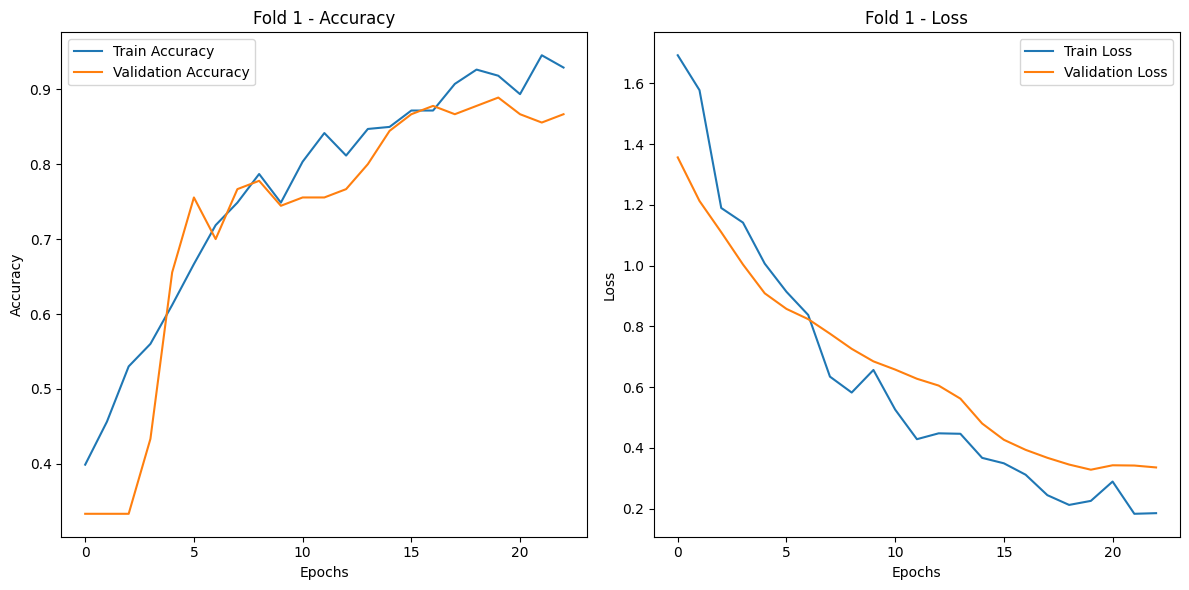

------------------------------------------------------------------------
Training for fold 2 ...
Found 366 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 595ms/step - accuracy: 0.3317 - loss: 2.0136 - val_accuracy: 0.2444 - val_loss: 1.1199
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.4579 - loss: 1.5821 - val_accuracy: 0.3333 - val_loss: 1.0774
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.4783 - loss: 1.3954 - val_accuracy: 0.4222 - val_loss: 1.0293
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.5361 - loss: 1.2595 - val_accuracy: 0.5111 - val_loss: 0.9942
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.5943 - loss: 1.0368 - val_accuracy: 0.5444 - val_loss: 0.9599
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.6947 - loss: 0.7862 - val_accuracy: 0.5556 - val_loss: 0.9263
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step -

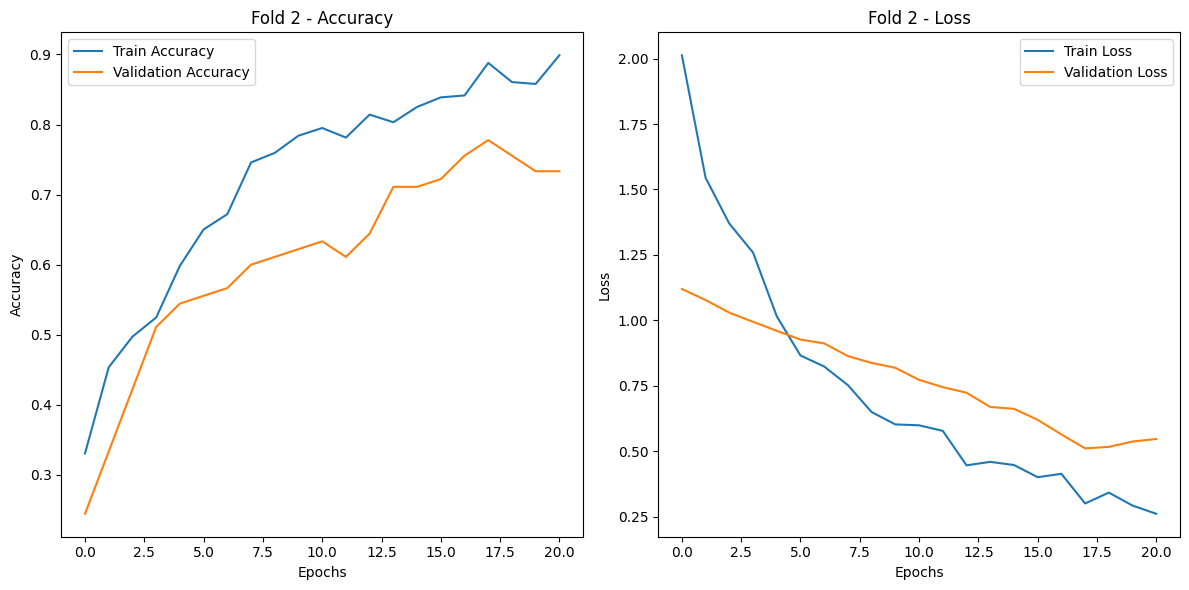

------------------------------------------------------------------------
Training for fold 3 ...
Found 366 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 552ms/step - accuracy: 0.2986 - loss: 1.9951 - val_accuracy: 0.3333 - val_loss: 1.2632
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.3648 - loss: 1.6918 - val_accuracy: 0.3333 - val_loss: 1.1790
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.4980 - loss: 1.2882 - val_accuracy: 0.3444 - val_loss: 1.0996
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.5414 - loss: 1.1750 - val_accuracy: 0.3778 - val_loss: 1.0295
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.6269 - loss: 1.0012 - val_accuracy: 0.4778 - val_loss: 0.9705
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.6509 - loss: 0.8665 - val_accuracy: 0.5889 - val_loss: 0.9182
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step -

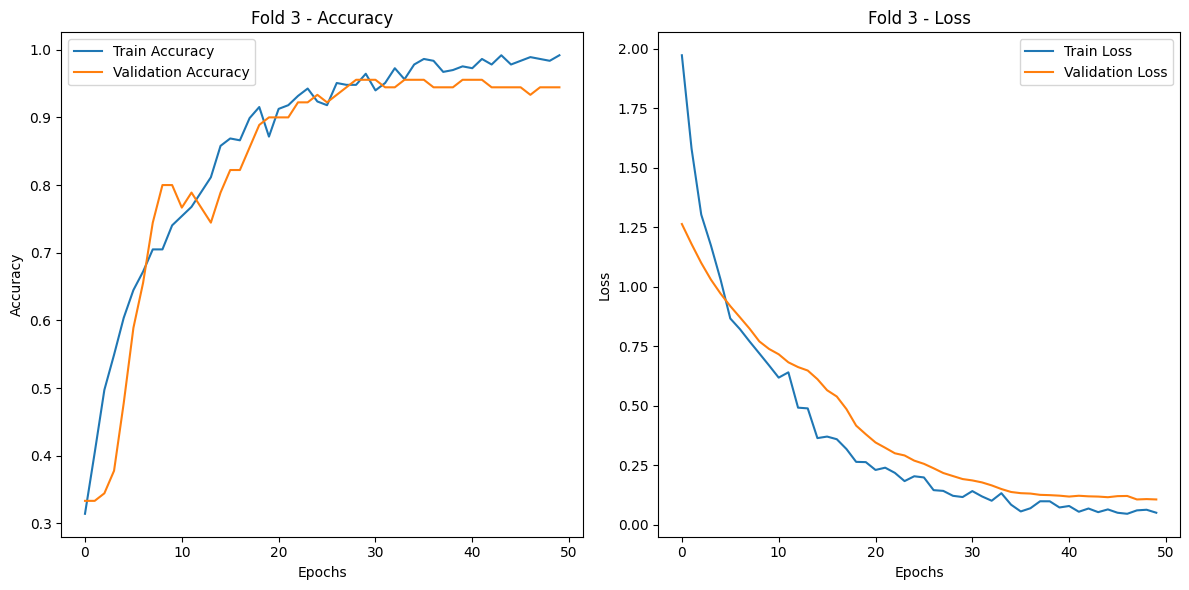

------------------------------------------------------------------------
Training for fold 4 ...
Found 366 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 497ms/step - accuracy: 0.3925 - loss: 1.7666 - val_accuracy: 0.3778 - val_loss: 1.1601
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.3957 - loss: 1.7344 - val_accuracy: 0.4889 - val_loss: 1.0967
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.4801 - loss: 1.3097 - val_accuracy: 0.5000 - val_loss: 1.0437
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - accuracy: 0.5523 - loss: 1.2294 - val_accuracy: 0.5556 - val_loss: 0.9861
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.6191 - loss: 1.0440 - val_accuracy: 0.5889 - val_loss: 0.9429
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.6564 - loss: 0.8995 - val_accuracy: 0.6667 - val_loss: 0.9077
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step -

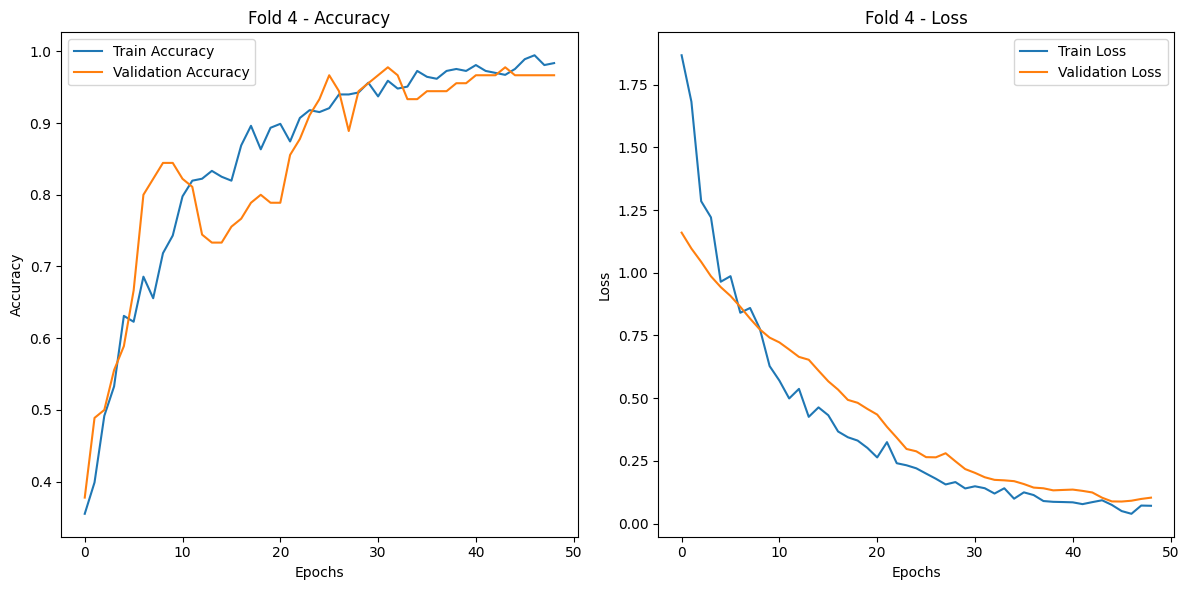

------------------------------------------------------------------------
Training for fold 5 ...
Found 366 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 493ms/step - accuracy: 0.3256 - loss: 2.1325 - val_accuracy: 0.3333 - val_loss: 1.2201
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.4021 - loss: 1.7413 - val_accuracy: 0.3333 - val_loss: 1.1504
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.5223 - loss: 1.2219 - val_accuracy: 0.3778 - val_loss: 1.0728
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.5638 - loss: 1.2128 - val_accuracy: 0.4556 - val_loss: 0.9914
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.6317 - loss: 1.0092 - val_accuracy: 0.5333 - val_loss: 0.9295
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0.6513 - loss: 0.9423 - val_accuracy: 0.6111 - val_loss: 0.8694
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step -

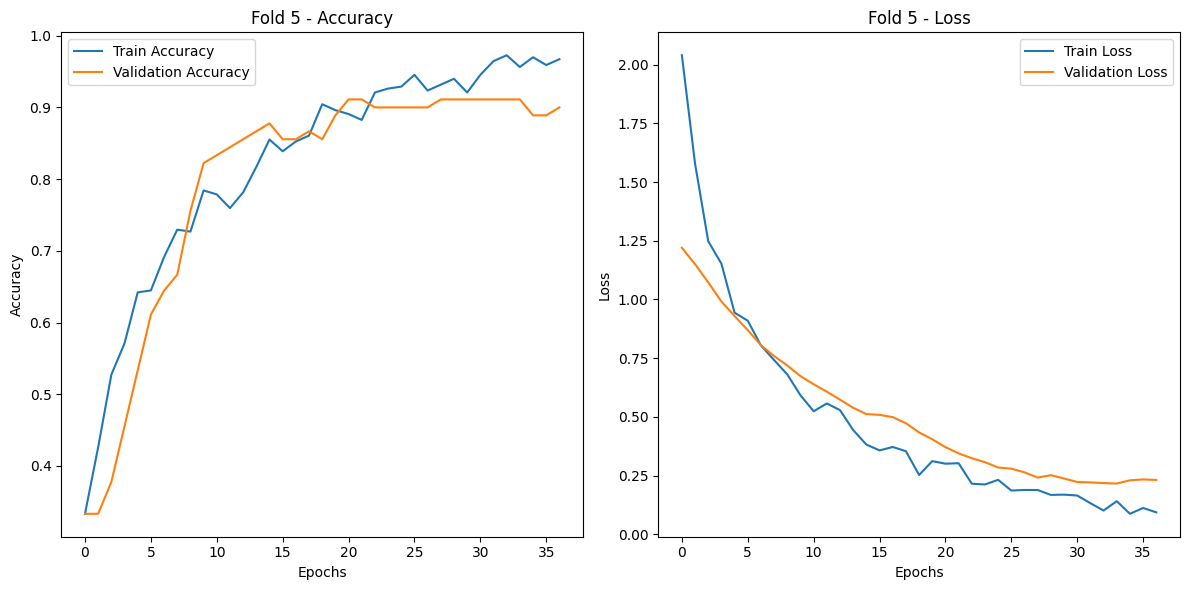

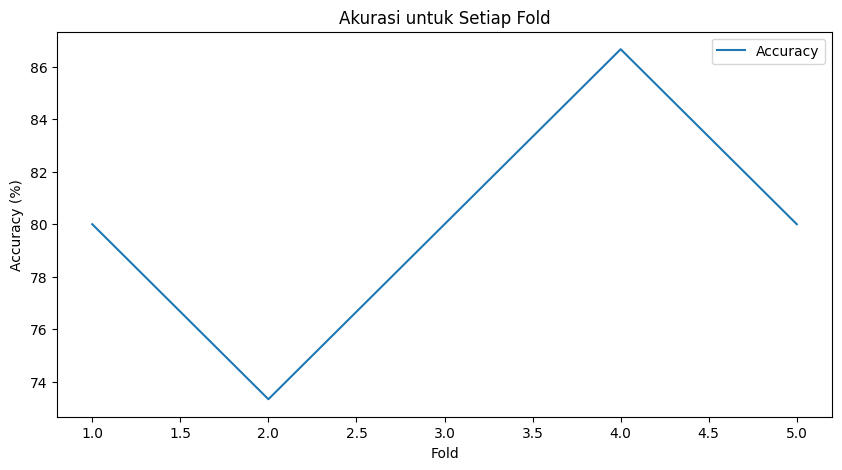

Average Accuracy: 80.00%
Average Loss: 0.5415


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Path ke folder training dan testing
train_folder = '/content/train_dataset'
test_folder = '/content/test_dataset'

# Parameter pelatihan
batch_size = 32
epochs = 50
image_size = (224, 224)
num_classes = 3  # Ganti dengan jumlah kelas yang sesuai

# ImageDataGenerator untuk training dan validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Split validation 20%
test_datagen = ImageDataGenerator(rescale=1./255)

# Generator data untuk testing
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# StratifiedKFold untuk cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan hasil akurasi dan loss dari setiap fold
accuracy_per_fold = []
loss_per_fold = []

# Loop melalui setiap fold
fold_no = 1
for train_idx, val_idx in kfold.split(train_datagen.flow_from_directory(
        train_folder,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True).filenames,
    train_datagen.flow_from_directory(
        train_folder,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True).classes):

    print(f"------------------------------------------------------------------------")
    print(f"Training for fold {fold_no} ...")

    # Buat generator data untuk training dan validation berdasarkan subset dari StratifiedKFold
    train_generator_fold = train_datagen.flow_from_directory(
        train_folder,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',  # Gunakan subset training
        shuffle=True,
        seed=42
    )

    validation_generator_fold = train_datagen.flow_from_directory(
        train_folder,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',  # Gunakan subset validation
        shuffle=True,
        seed=42
    )

    # Definisikan arsitektur CNN VGG16
    def build_vgg16_model(num_classes):
        # Muat model VGG16 tanpa lapisan fully connected
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

        # Bekukan layer-layer pada base model
        for layer in base_model.layers[:15]:  # Bekukan lapisan awal
            layer.trainable = False

        # Tambahkan lapisan fully connected baru
        x = Flatten()(base_model.output)
        x = Dense(512, activation='relu')(x)  # Mengubah neuron menjadi 512
        x = BatchNormalization()(x)  # Batch Normalization
        x = Dropout(0.5)(x)  # Dropout untuk menghindari overfitting
        x = Dense(256, activation='relu')(x)  # Lapisan tambahan
        x = BatchNormalization()(x)  # Batch Normalization
        x = Dropout(0.5)(x)  # Dropout lagi
        predictions = Dense(num_classes, activation='softmax')(x)

        # Buat model baru
        model = Model(inputs=base_model.input, outputs=predictions)

        # Compile model dengan learning rate yang lebih kecil
        model.compile(optimizer=Adam(learning_rate=0.00001),  # Optimizer Adam
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        return model

    # Buat model
    model = build_vgg16_model(num_classes)

    # Tambahkan callback EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Latih model
    history = model.fit(
        train_generator_fold,
        validation_data=validation_generator_fold,
        epochs=epochs,
        callbacks=[early_stopping]
    )

    # Evaluasi model pada data testing
    scores = model.evaluate(test_generator, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    # Simpan hasil akurasi dan loss dari fold ini
    accuracy_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Plot hasil training dan validation
    plt.figure(figsize=(12, 6))

    # Plot Akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold_no} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Pindahkan ke fold selanjutnya
    fold_no += 1

# Plot keseluruhan hasil akurasi dan loss per fold
plt.figure(figsize=(10, 5))
plt.plot(range(1, fold_no), accuracy_per_fold, label='Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Akurasi untuk Setiap Fold')
plt.legend()
plt.show()

# Hitung rata-rata akurasi dan loss dari semua fold
average_accuracy = np.mean(accuracy_per_fold)
average_loss = np.mean(loss_per_fold)

print(f"Average Accuracy: {average_accuracy:.2f}%")
print(f"Average Loss: {average_loss:.4f}")


In [23]:
# prompt: simpan hasil pelatian tersebut



# Simpan model ke Google Drive
model_save_path = '/content/drive/MyDrive/model_martinfixbgtbgt.h5'  # Ganti dengan path yang diinginkan
model.save(model_save_path)

print(f"Model berhasil disimpan di {model_save_path}")

Model berhasil disimpan di /content/drive/MyDrive/model_martinfixbgtbgt.h5


Found 456 images belonging to 3 classes.
Found 456 images belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 1 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


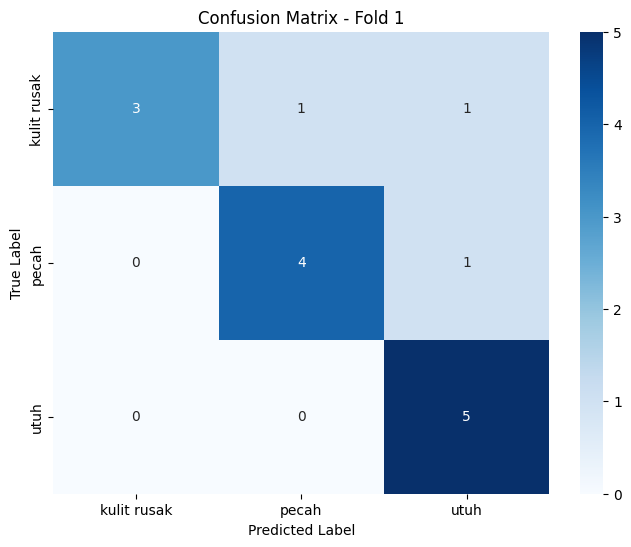

------------------------------------------------------------------------
Training for fold 2 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


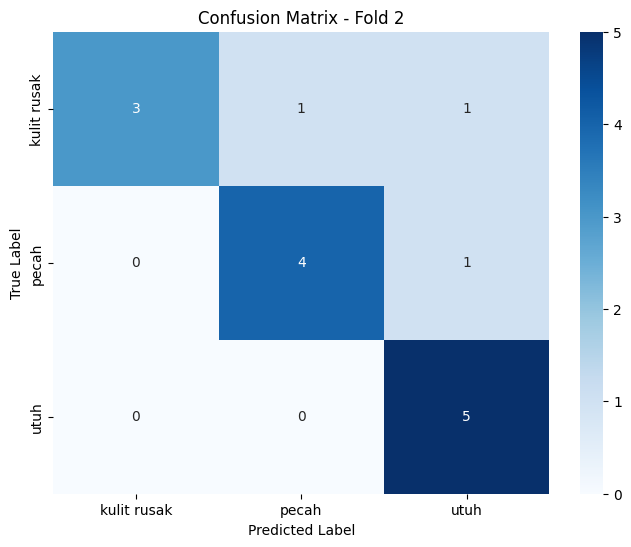

------------------------------------------------------------------------
Training for fold 3 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


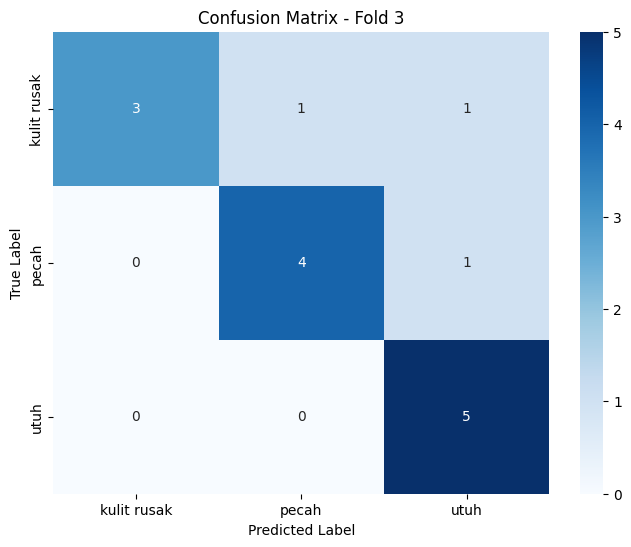

------------------------------------------------------------------------
Training for fold 4 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


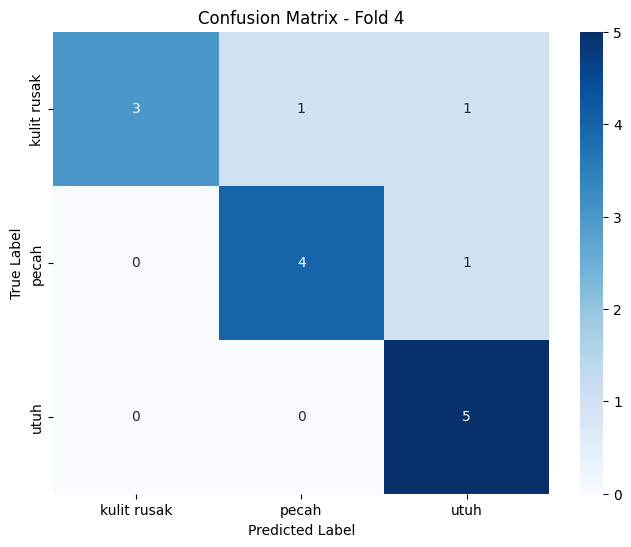

------------------------------------------------------------------------
Training for fold 5 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


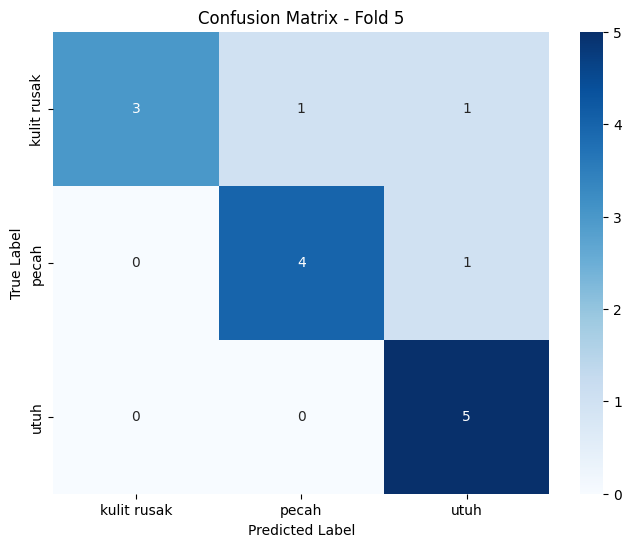

In [26]:
# prompt: tampilkan confusion matrix dari masing masing fold. buat dengan tampilan grafik

from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (Kode sebelumnya) ...

# List untuk menyimpan confusion matrix dari setiap fold
confusion_matrices = []

# Loop melalui setiap fold
fold_no = 1
for train_idx, val_idx in kfold.split(train_datagen.flow_from_directory(
        train_folder,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True).filenames,
    train_datagen.flow_from_directory(
        train_folder,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True).classes):

    print(f"------------------------------------------------------------------------")
    print(f"Training for fold {fold_no} ...")

    # ... (Kode training model) ...

    # Predict the classes for the test set
    y_pred_prob = model.predict(test_generator)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = test_generator.classes

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    confusion_matrices.append(cm)

    # Plot confusion matrix for this fold
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.title(f'Confusion Matrix - Fold {fold_no}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ... (Kode lainnya) ...

    fold_no += 1

In [30]:
# prompt: dari hasil convusion matrix tersebut berikan berapa nilai akurasi,presisi , recall, f-1 score dan average test akurasi

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have y_true and y_pred from your model's evaluation on the test set
# y_true = test_generator.classes
# y_pred_prob = model.predict(test_generator)
# y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# You already have average test accuracy calculated in your code as 'average_accuracy'
print(f"Average Test Accuracy: {average_accuracy:.4f}%")

Accuracy: 0.8000
Precision: 0.8381
Recall: 0.8000
F1-Score: 0.7944
Average Test Accuracy: 80.0000%


Found 456 images belonging to 3 classes.
Found 456 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


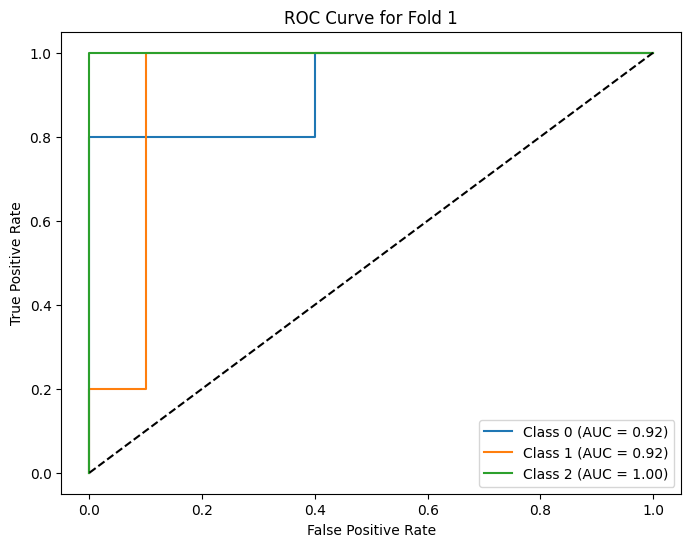

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


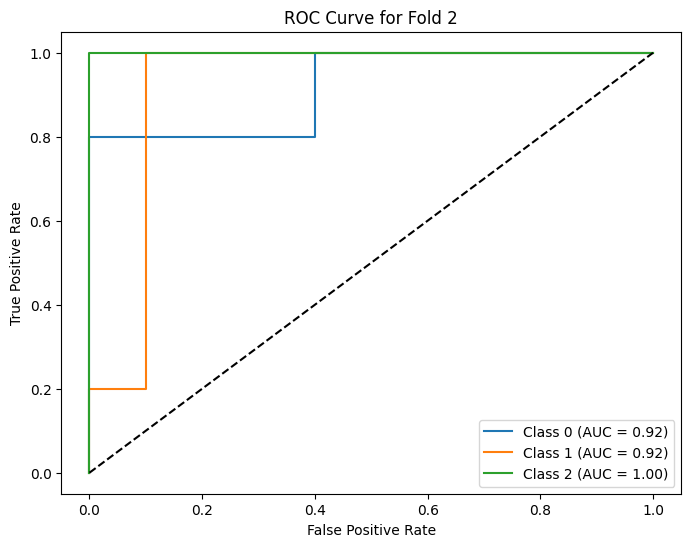

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


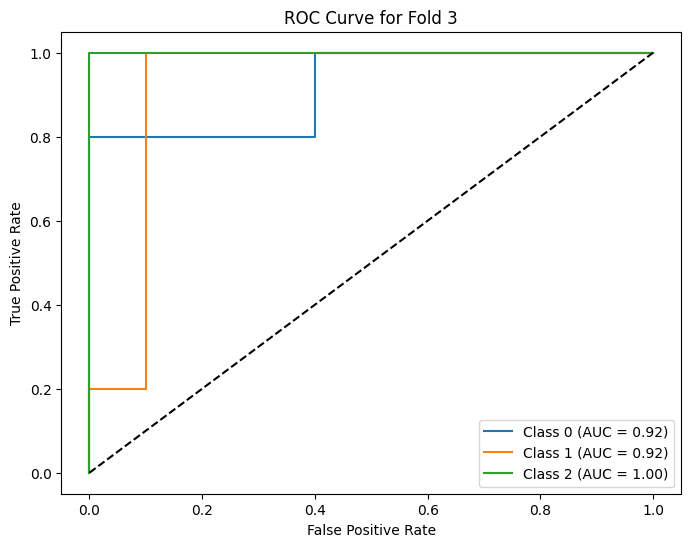

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


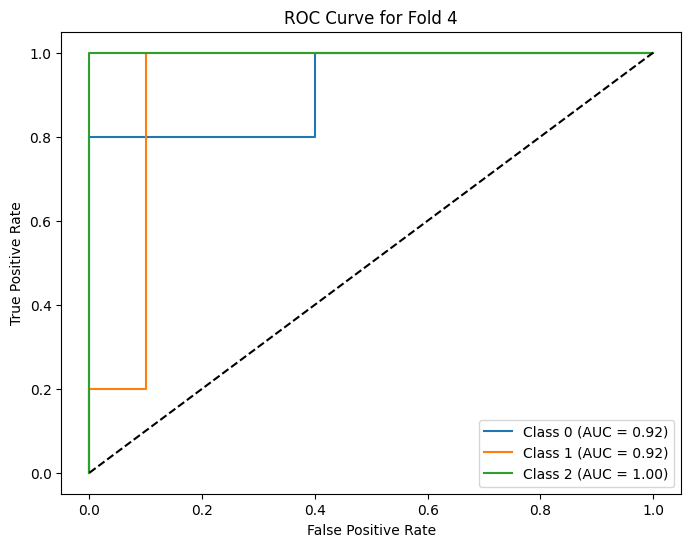

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


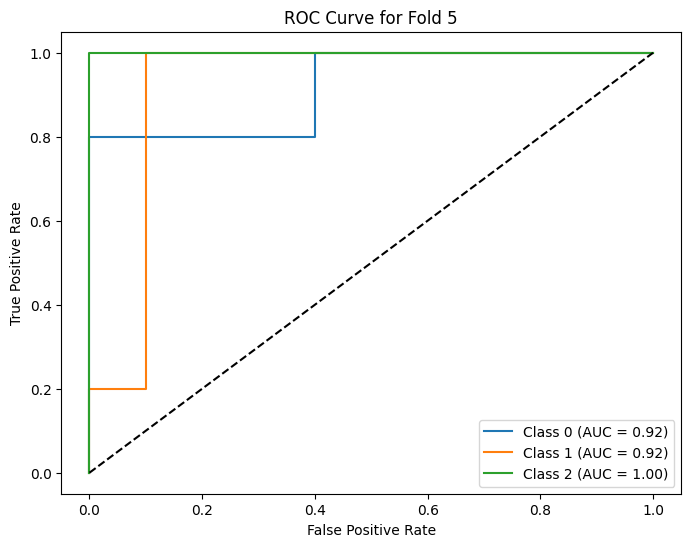

In [24]:
# prompt: tampilkan roc masing masing fold

from sklearn.metrics import roc_curve, auc
import numpy as np


# List untuk menyimpan hasil ROC AUC dari setiap fold
roc_auc_per_fold = []

# Loop melalui setiap fold
fold_no = 1
for train_idx, val_idx in kfold.split(train_datagen.flow_from_directory(
        train_folder,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True).filenames,
    train_datagen.flow_from_directory(
        train_folder,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True).classes):

    # ... (Kode pelatihan untuk setiap fold) ...

    # Prediksi probabilitas pada data testing untuk setiap kelas
    y_pred_prob = model.predict(test_generator)

    # Ambil label sebenarnya dari data testing
    y_true = test_generator.classes

    # Hitung ROC AUC untuk setiap kelas
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_pred_prob.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Simpan ROC AUC dari fold ini
    roc_auc_per_fold.append(roc_auc)

    # Plot ROC curve untuk setiap kelas pada fold ini
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Fold {fold_no}')
    plt.legend(loc='best')
    plt.show()

    # Pindahkan ke fold selanjutnya
    fold_no += 1
